# Introduction to Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [https://seaborn.pydata.org/]

In [1]:
import seaborn as sns

In [2]:
# Apply the default theme
sns.set_theme()

The `set_theme()` will affect how all matplotlib plots look, even if you don’t make them with seaborn.

In [3]:
# Load an example dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


`relplot()` function produces a scatter plot (or relationship plot) between two variables: x and y.

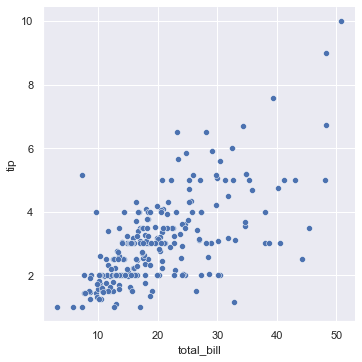

In [4]:
sns.relplot(data=tips, x="total_bill", y="tip");            

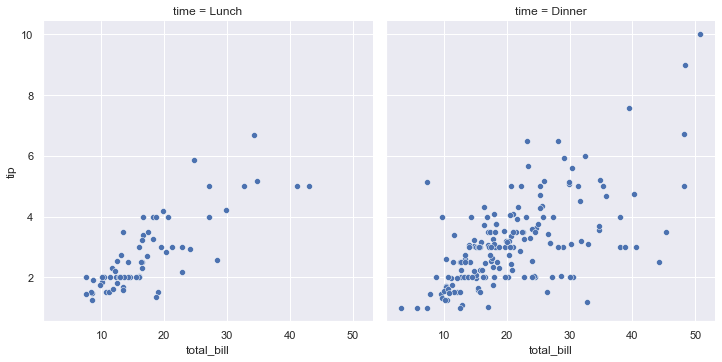

In [5]:
# Using col parameter
sns.relplot(data=tips, x="total_bill", y="tip", 
            col="time");    

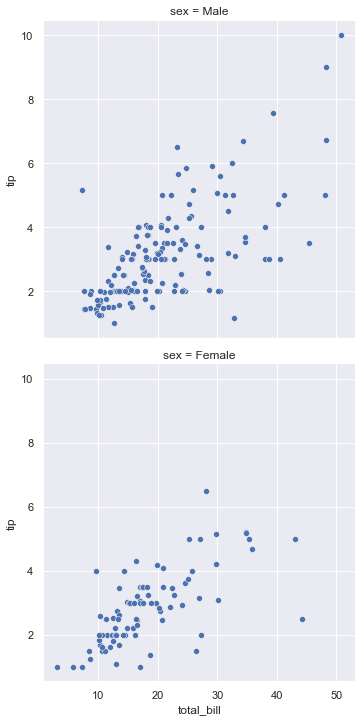

In [6]:
# Using row parameter
sns.relplot(data=tips, x="total_bill", y="tip", 
            row="sex");   

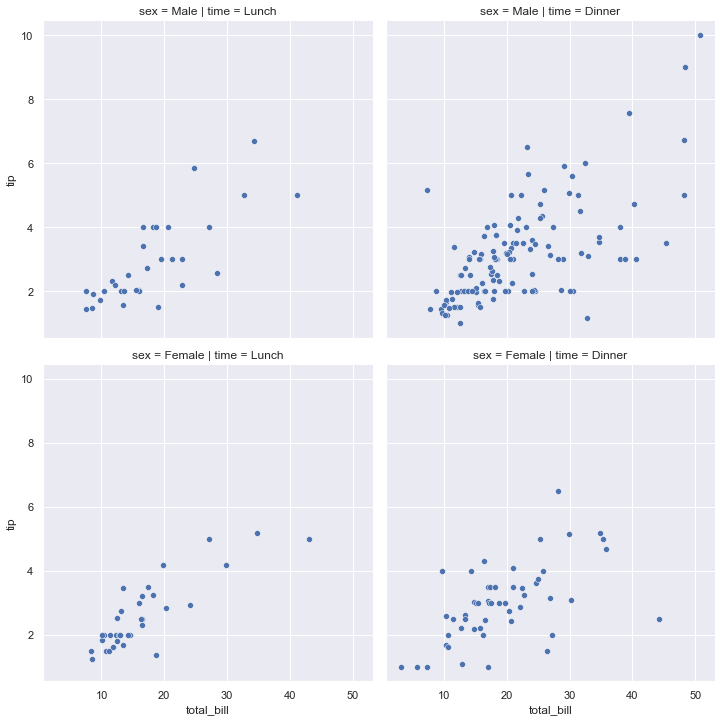

In [7]:
# Using col and row parameters
sns.relplot(data=tips, x="total_bill", y="tip", 
            col="time", row="sex");  

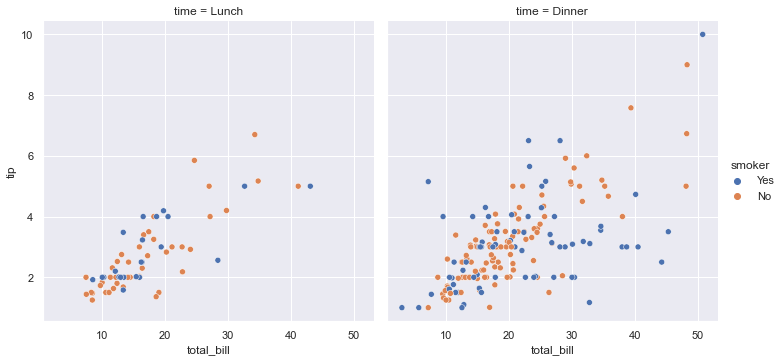

In [8]:
# Using hue parameter
sns.relplot(data=tips, x="total_bill", y="tip", 
            col="time", hue="smoker");

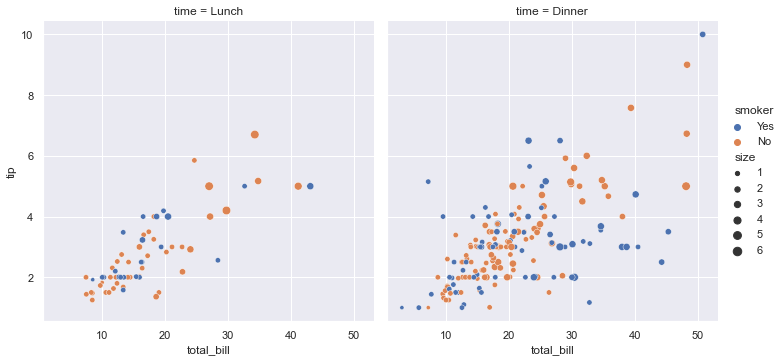

In [9]:
# Using size parameter
sns.relplot(data=tips, 
            x="total_bill", y="tip", 
            col="time", hue="smoker", size="size");

This plot shows the relationship between several variables in the tips dataset using a single call to the seaborn function `relplot()`. 

We provided only the names of the variables and their roles in the plot.

## Distribution plots

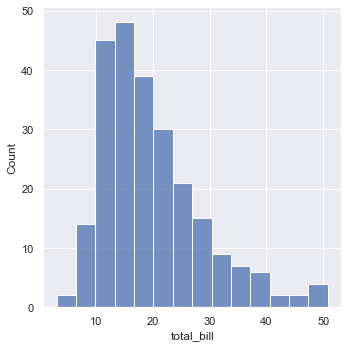

In [10]:
sns.displot(data=tips, x="total_bill");

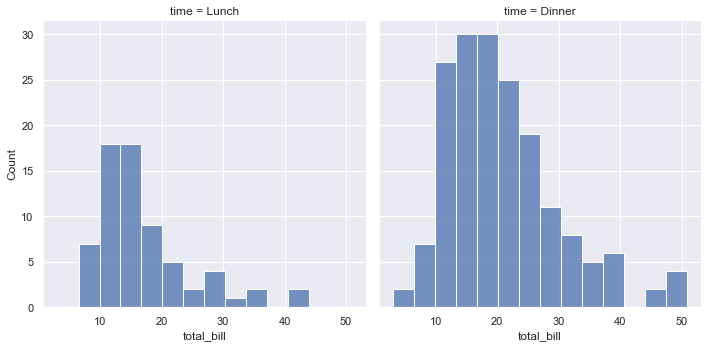

In [11]:
sns.displot(data=tips, x="total_bill",
            col="time");

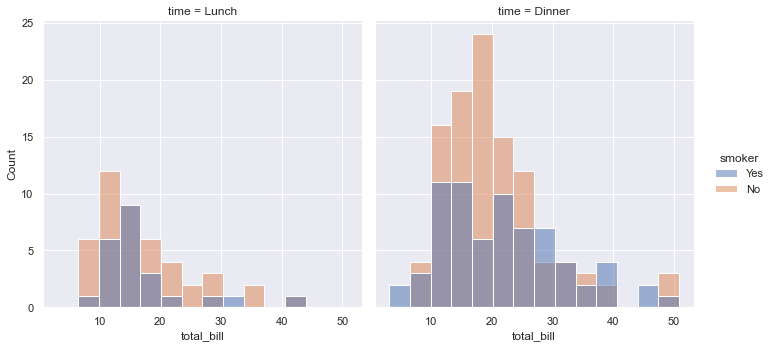

In [12]:
sns.displot(data=tips, x="total_bill",
            col="time", hue="smoker");

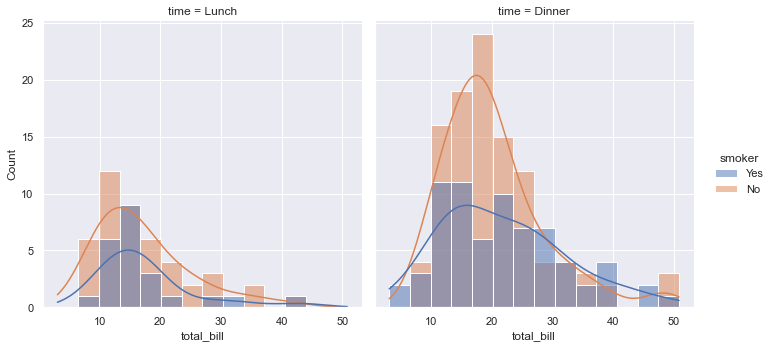

In [13]:
sns.displot(data=tips, x="total_bill",
            col="time", hue="smoker", kde=True);

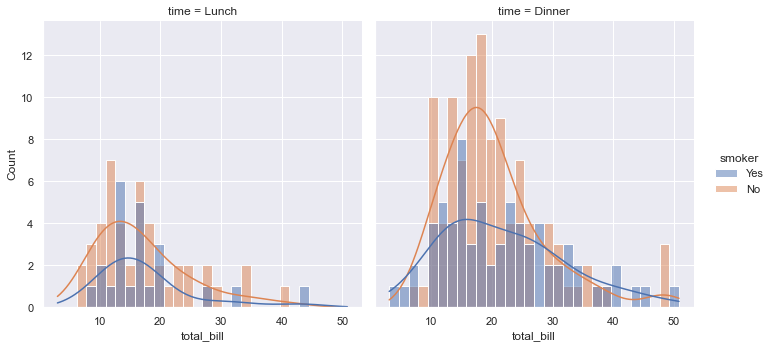

In [14]:
sns.displot(data=tips, x="total_bill", 
            col="time", hue="smoker", kde=True, bins=30);

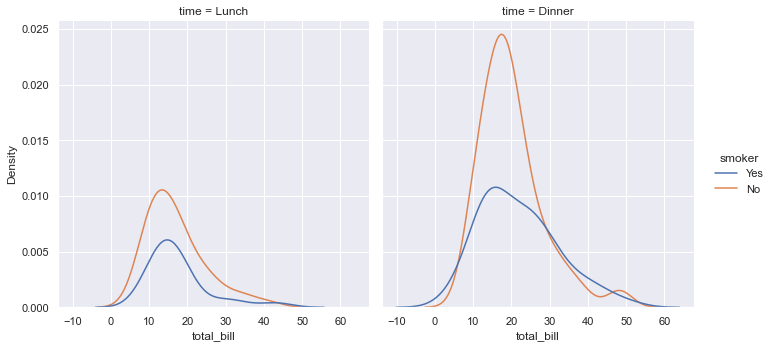

In [15]:
sns.displot(data=tips, x="total_bill", 
            col="time", hue="smoker", kind='kde');

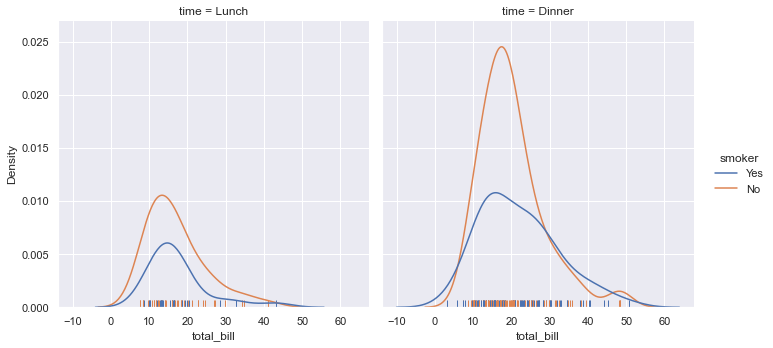

In [16]:
sns.displot(data=tips, x="total_bill", 
            col="time", hue="smoker", kind='kde', rug=True);

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. 

`jointplot()` focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

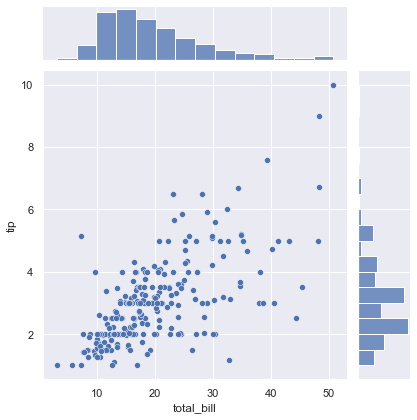

In [17]:
sns.jointplot(data=tips, x="total_bill", y="tip");

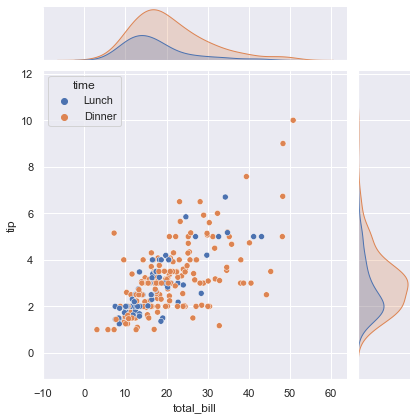

In [18]:
# Including the hue parameter
sns.jointplot(data=tips, x="total_bill", y="tip", hue="time");

`pairplot()`: takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
tips2 = tips[['total_bill', 'tip', 'time']]

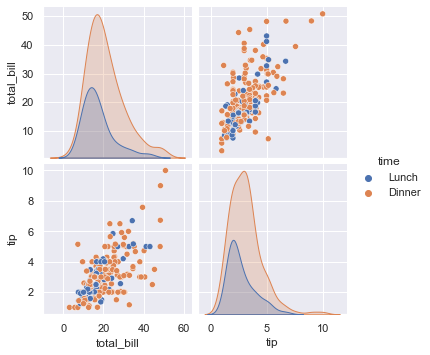

In [21]:
sns.pairplot(data=tips2, hue="time");